In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [4]:
data = pd.read_csv('breast_cancer_data.csv')
print("Dataset loaded successfully. Shape:", data.shape)
data.head()

Dataset loaded successfully. Shape: (569, 6)


mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0

Text(0, 0.5, 'Feature 2')

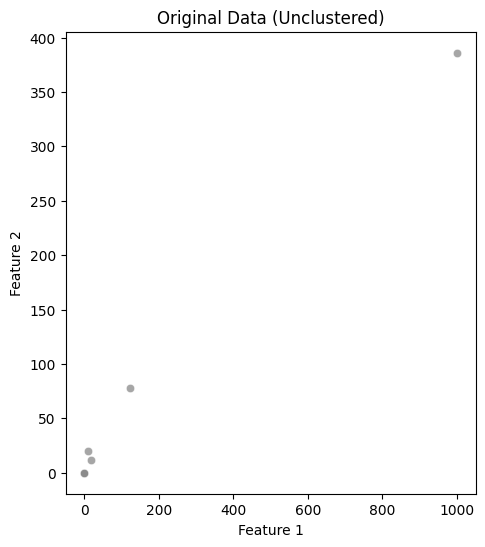

In [6]:
# Visualize the Original Data
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x=data.iloc[0], y=data.iloc[3], color='grey', alpha=0.7)
plt.title('Original Data (Unclustered)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [7]:
# Apply K-Means Clustering
print("\n--- Applying K-Means ---")
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data)
kmeans_centers = kmeans.cluster_centers_


--- Applying K-Means ---


In [8]:
# Apply GMM Clustering
print("--- Applying GMM ---")
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(data)
gmm_centers = gmm.means_

--- Applying GMM ---


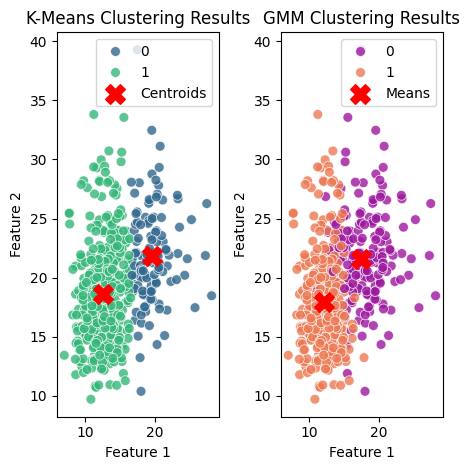

In [11]:
# Plot K-Means results
plt.subplot(1, 3, 2)
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=kmeans_labels, palette='viridis', s=50, alpha=0.8)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot GMM results
plt.subplot(1, 3, 3)
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=gmm_labels, palette='plasma', s=50, alpha=0.8)
plt.scatter(gmm_centers[:, 0], gmm_centers[:, 1], s=200, c='red', marker='X', label='Means')
plt.title('GMM Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:

print("\n--- Quantitative Comparison ---")

# Silhouette Score (higher is better, ranges from -1 to 1)
# Measures how similar a point is to its own cluster compared to other clusters.
kmeans_silhouette = silhouette_score(data, kmeans_labels)
gmm_silhouette = silhouette_score(data, gmm_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"GMM Silhouette Score:     {gmm_silhouette:.4f}")



--- Quantitative Comparison ---
K-Means Silhouette Score: 0.6991
GMM Silhouette Score:     0.4754
